In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from scipy.optimize import curve_fit

sns.set_context('talk')
sns.set_style("ticks")
sns.set_palette("colorblind")

def line(x,m,b):
    return (m*x) + b
    

def read_QDP(file):
#     Takes in a file and returns an array with the QDP data
    data = [[]]
    i = 0
    j = 0
    for line in file:
        if i >2:
            temp = line.split()
            if temp[0] != 'NO':
                if temp[-1]=='NO':
                    temp = temp[:-1]
                data[-1].append(temp)
            else:
                data.append([])
        i += 1
    for i in range(len(data)):
        data[i] = np.array(data[i]).astype(float).T
    return data

root_dir = '/Volumes/Samsung_1TB/AstroData/MAXI_J1848m015/'
fig_dir = root_dir + 'figures/'

file_soft = open(root_dir + '90601340002_products06/tbabs_diskbb_pl_relxill_eeufspec.qdp', 'r')
file_hard = open(root_dir + '90601341002_products06/tbabs_cutoffpl_relxill_eeufspec.qdp', 'r')

data_soft = read_QDP(file_soft)
data_hard = read_QDP(file_hard)

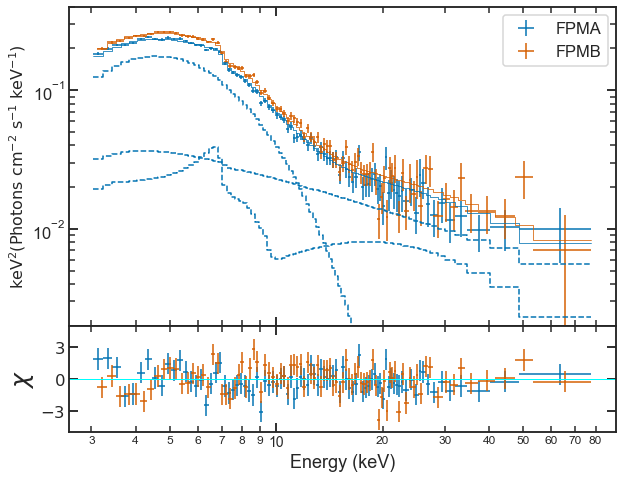

In [50]:
lw = 1.5
# ls = 'steps'
ls=''

# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[3, 1], 'hspace':0}, figsize=(9, 7))
ax1.errorbar(data_soft[0][0],data_soft[0][2], xerr=data_soft[0][1], yerr=data_soft[0][3], \
             ls=ls, lw=lw, color='C0', label = 'FPMA')
ax1.errorbar(data_soft[1][0],data_soft[1][2], xerr=data_soft[1][1], yerr=data_soft[1][3], \
             ls=ls, lw=lw, color='C3', label = 'FPMB')

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][4], [data_soft[0][4][-1]]]), where='post', color='C0', lw=0.5*lw)
ax1.step(np.concatenate([data_soft[1][0]-data_soft[1][1], [data_soft[1][0][-1]+data_soft[1][1][-1]]]), \
         np.concatenate([data_soft[1][4], [data_soft[1][4][-1]]]), where='post', color='C3', lw=0.5*lw)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][5], [data_soft[0][5][-1]]]), where='post', color='C0', ls='dashed', lw=lw)
# ax1.step(data_comp_gauss_eeufspec[1][0],data_comp_gauss_eeufspec[1][5], where='mid', color='C1', ls='dashed', lw=lw)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][6], [data_soft[0][6][-1]]]), where='post', color='C0', ls='dashed', lw=lw)
# ax1.step(data_comp_gauss_eeufspec[1][0],data_comp_gauss_eeufspec[1][6], where='mid', color='C1', ls='dotted', lw=lw)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][7], [data_soft[0][7][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

ax2.errorbar(data_soft[0][0],(data_soft[0][2]-data_soft[0][4])/data_soft[0][3], xerr=data_soft[0][1], yerr=1.0, \
             ls=ls, color='C0', lw=lw)
ax2.errorbar(data_soft[1][0],(data_soft[1][2] - data_soft[1][4])/data_soft[1][3], xerr=data_soft[1][1],yerr=1.0, \
             ls=ls, color='C3', lw=lw)
ax1.set_ylim(2e-3,0.4)
ax1.legend()
ax1.loglog()
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{keV^{2}(Photons\ cm^{-2}\ s^{-1}\ keV^{-1})}$', fontsize=16)
# ax2.set_ylabel(r'$\frac{data}{model}$')
# ax2.axhline(1,color='cyan', lw=1.0)
ax2.set_ylabel(r'$\chi$', fontsize=25)
ax2.axhline(0,color='cyan', lw=1.0)
ax2.set_ylim(-5,5)

# ax1.text(2.9, 2e-5, '(a)')
# ax2.text(2.9, -4, '(b)')

ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# ax1.set_yticks(ticks= [], minor=True)

ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

ax2.set_xticks(ticks= [10], minor=False)
ax2.set_xticklabels(labels= [10], minor=False, fontsize=14)

ax2.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
ax2.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

plt.tight_layout()

plt.savefig(fig_dir + 'soft_spectrum.pdf')



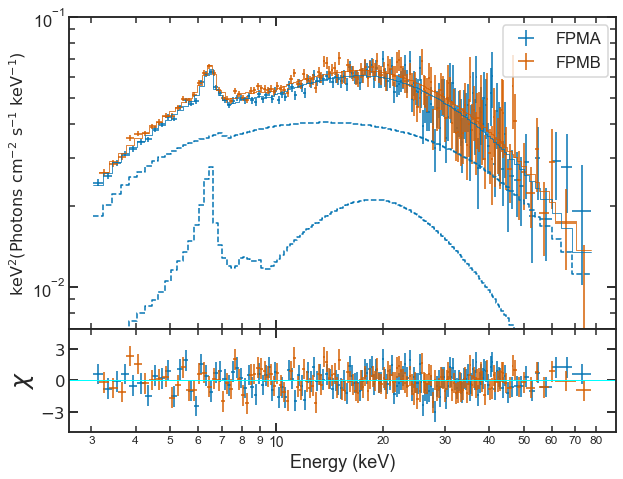

In [51]:
# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[3, 1], 'hspace':0}, figsize=(9, 7))
ax1.errorbar(data_hard[0][0],data_hard[0][2], xerr=data_hard[0][1], yerr=data_hard[0][3], \
             ls=ls, lw=lw, color='C0', label = 'FPMA')
ax1.errorbar(data_hard[1][0],data_hard[1][2], xerr=data_hard[1][1], yerr=data_hard[1][3], \
             ls=ls, lw=lw, color='C3', label = 'FPMB')

ax1.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][4], [data_hard[0][4][-1]]]), where='post', color='C0', lw=0.5*lw)
ax1.step(np.concatenate([data_hard[1][0]-data_hard[1][1], [data_hard[1][0][-1]+data_hard[1][1][-1]]]), \
         np.concatenate([data_hard[1][4], [data_hard[1][4][-1]]]), where='post', color='C3', lw=0.5*lw)

ax1.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][5], [data_hard[0][5][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

ax1.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][6], [data_hard[0][6][-1]]]), where='post', color='C0', ls='dashed', lw=lw)



ax2.errorbar(data_hard[0][0],(data_hard[0][2]-data_hard[0][4])/data_hard[0][3], xerr=data_hard[0][1], yerr=1.0, \
             ls=ls, color='C0', lw=lw)
ax2.errorbar(data_hard[1][0],(data_hard[1][2] - data_hard[1][4])/data_hard[1][3], xerr=data_hard[1][1],yerr=1.0, \
             ls=ls, color='C3', lw=lw)
ax1.set_ylim(7e-3,1e-1)
ax1.legend()
ax1.loglog()
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{keV^{2}(Photons\ cm^{-2}\ s^{-1}\ keV^{-1})}$', fontsize=16)
# ax2.set_ylabel(r'$\frac{data}{model}$')
# ax2.axhline(1,color='cyan', lw=1.0)
ax2.set_ylabel(r'$\chi$', fontsize=25)
ax2.axhline(0,color='cyan', lw=1.0)
ax2.set_ylim(-5,5)

# ax1.text(2.9, 2e-5, '(a)')
# ax2.text(2.9, -4, '(b)')

ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# ax1.set_yticks(ticks= [], minor=True)

ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

ax2.set_xticks(ticks= [10], minor=False)
ax2.set_xticklabels(labels= [10], minor=False, fontsize=14)

ax2.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
ax2.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

plt.tight_layout()

plt.savefig(fig_dir + 'hard_spectrum.pdf')



AxesSubplot(0.125,0.125;0.775x0.755)


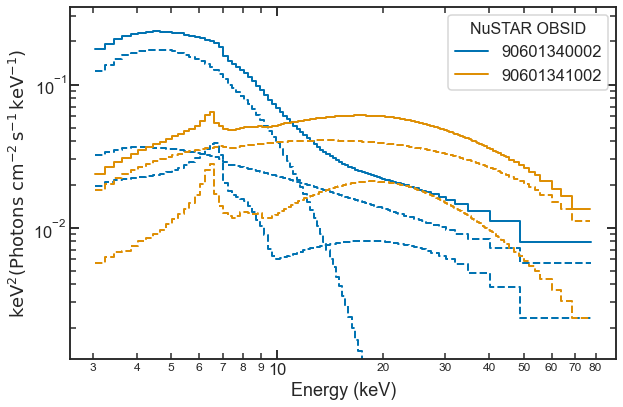

In [52]:
# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig = plt.figure(figsize=(9,6))
lw = 2.0
# ls = 'steps'
ls=''

# plt.errorbar(data_soft[0][0],data_soft[0][2], xerr=data_soft[0][1], yerr=data_soft[0][3], \
#                  ls=ls, color='C0', lw=lw, label='90601340002')
# plt.errorbar(data_soft[1][0],data_soft[1][2], xerr=data_soft[1][1], yerr=data_soft[1][3], \
#                  ls=ls, color='C0', lw=lw, label='90601340002', marker='o', ms=6)
plt.step(np.concatenate([data_soft[0][0] - data_soft[0][1],[data_soft[0][0][-1] + data_soft[0][1][-1]]]),\
             np.concatenate([data_soft[0][4],[data_soft[0][4][-1]]]) , color='C0', where='post', lw = lw, label='90601340002')

plt.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][5], [data_soft[0][5][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

plt.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][6], [data_soft[0][6][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

plt.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][7], [data_soft[0][7][-1]]]), where='post', color='C0', ls='dashed', lw=lw)


# plt.errorbar(data_hard[0][0],data_hard[0][2], xerr=data_hard[0][1], yerr=data_hard[0][3], \
#              ls =ls, color='C1', lw=lw, label='90601341002')
plt.step(np.concatenate([data_hard[0][0] - data_hard[0][1],[data_hard[0][0][-1] + data_hard[0][1][-1]]]),\
             np.concatenate([data_hard[0][4],[data_hard[0][4][-1]]]) , color='C1', where='post', lw = lw, label='90601341002')
    
plt.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][5], [data_hard[0][5][-1]]]), where='post', color='C1', ls='dashed', lw=lw)

plt.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][6], [data_hard[0][6][-1]]]), where='post', color='C1', ls='dashed', lw=lw)

    
    
plt.legend(title='NuSTAR OBSID', title_fontsize=16)
plt.loglog()
plt.xlabel('Energy (keV)')
plt.ylabel(r'$\mathrm{keV^{2}(Photons\ cm^{-2}\,s^{-1}\,keV^{-1})}$')
plt.ylim(1.2e-3,0.35)

ax = fig.axes[0]
print(ax)

ax.set_xticks(ticks= [10], minor=False)
ax.set_xticklabels(labels= [10], minor=False)

ax.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
ax.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)


ax.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)



plt.tight_layout()
plt.savefig(fig_dir + 'FPMA_models.pdf')



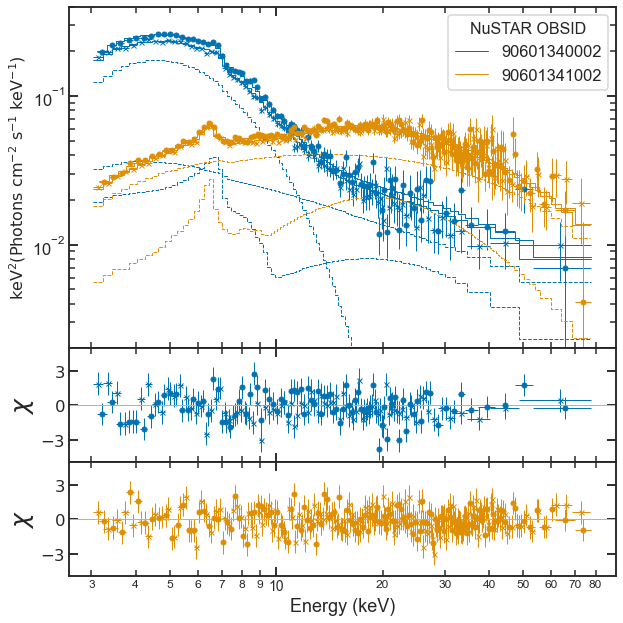

In [53]:
ms=5
lw=1


# When plotting QDP, the 0th column is X, 1st is X error, 2nd is Y, 3rd is Y error, and 4th is the model
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True,  gridspec_kw = {'height_ratios':[3, 1, 1], 'hspace':0}, figsize=(9, 9))
ax1.errorbar(data_soft[0][0],data_soft[0][2], xerr=data_soft[0][1], yerr=data_soft[0][3], \
             ls=ls, lw=lw, color='C0', marker='x', ms=ms)
ax1.errorbar(data_soft[1][0],data_soft[1][2], xerr=data_soft[1][1], yerr=data_soft[1][3], \
             ls=ls, lw=lw, color='C0', marker='o', ms=ms)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][4], [data_soft[0][4][-1]]]), where='post', color='C0', lw=lw, label='90601340002')
ax1.step(np.concatenate([data_soft[1][0]-data_soft[1][1], [data_soft[1][0][-1]+data_soft[1][1][-1]]]), \
         np.concatenate([data_soft[1][4], [data_soft[1][4][-1]]]), where='post', color='C0', lw=lw)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][5], [data_soft[0][5][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][6], [data_soft[0][6][-1]]]), where='post', color='C0', ls='dashed', lw=lw)

ax1.step(np.concatenate([data_soft[0][0]-data_soft[0][1], [data_soft[0][0][-1]+data_soft[0][1][-1]]]), \
         np.concatenate([data_soft[0][7], [data_soft[0][7][-1]]]), where='post', color='C0', ls='dashed', lw=lw)



ax1.errorbar(data_hard[0][0],data_hard[0][2], xerr=data_hard[0][1], yerr=data_hard[0][3], \
             ls=ls, lw=lw, color='C1', marker='x', ms=ms)
ax1.errorbar(data_hard[1][0],data_hard[1][2], xerr=data_hard[1][1], yerr=data_hard[1][3], \
             ls=ls, lw=lw, color='C1', marker='o', ms=ms)

ax1.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][4], [data_hard[0][4][-1]]]), where='post', color='C1', lw=lw, label='90601341002')
ax1.step(np.concatenate([data_hard[1][0]-data_hard[1][1], [data_hard[1][0][-1]+data_hard[1][1][-1]]]), \
         np.concatenate([data_hard[1][4], [data_hard[1][4][-1]]]), where='post', color='C1', lw=lw)

ax1.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][5], [data_hard[0][5][-1]]]), where='post', color='C1', ls='dashed', lw=lw)

ax1.step(np.concatenate([data_hard[0][0]-data_hard[0][1], [data_hard[0][0][-1]+data_hard[0][1][-1]]]), \
         np.concatenate([data_hard[0][6], [data_hard[0][6][-1]]]), where='post', color='C1', ls='dashed', lw=lw)




ax2.errorbar(data_soft[0][0],(data_soft[0][2]-data_soft[0][4])/data_soft[0][3], xerr=data_soft[0][1], yerr=1.0, \
             ls=ls, color='C0', lw=lw, marker='x', ms=ms)
ax2.errorbar(data_soft[1][0],(data_soft[1][2] - data_soft[1][4])/data_soft[1][3], xerr=data_soft[1][1],yerr=1.0, \
             ls=ls, color='C0', lw=lw, marker='o', ms=ms)

ax3.errorbar(data_hard[0][0],(data_hard[0][2]-data_hard[0][4])/data_hard[0][3], xerr=data_hard[0][1], yerr=1.0, \
             ls=ls, color='C1', lw=lw, marker='x', ms=ms)
ax3.errorbar(data_hard[1][0],(data_hard[1][2] - data_hard[1][4])/data_hard[1][3], xerr=data_hard[1][1],yerr=1.0, \
             ls=ls, color='C1', lw=lw, marker='o', ms=ms)


ax1.set_ylim(2e-3,0.4)
ax1.legend(title='NuSTAR OBSID', title_fontsize=16)
ax1.loglog()
plt.xlabel('Energy (keV)')
ax1.set_ylabel(r'$\mathrm{keV^{2}(Photons\ cm^{-2}\ s^{-1}\ keV^{-1})}$', fontsize=16)
# ax2.set_ylabel(r'$\frac{data}{model}$')
# ax2.axhline(1,color='cyan', lw=1.0)
ax2.set_ylabel(r'$\chi$', fontsize=25)
ax2.axhline(0,color='cyan', lw=1.0)
ax2.set_ylim(-5,5)

ax3.set_ylabel(r'$\chi$', fontsize=25)
ax3.axhline(0,color='cyan', lw=1.0)
ax3.set_ylim(-5,5)

# ax1.text(2.9, 2e-5, '(a)')
# ax2.text(2.9, -4, '(b)')

ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# ax1.set_yticks(ticks= [], minor=True)

ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

ax3.set_yticks(ticks= [-3, 0, 3], minor=False)
ax3.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

ax3.set_xticks(ticks= [10], minor=False)
ax3.set_xticklabels(labels= [10], minor=False, fontsize=14)

ax3.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
ax3.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax3.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

plt.tight_layout()

plt.savefig(fig_dir + 'spectra_and_models.pdf')



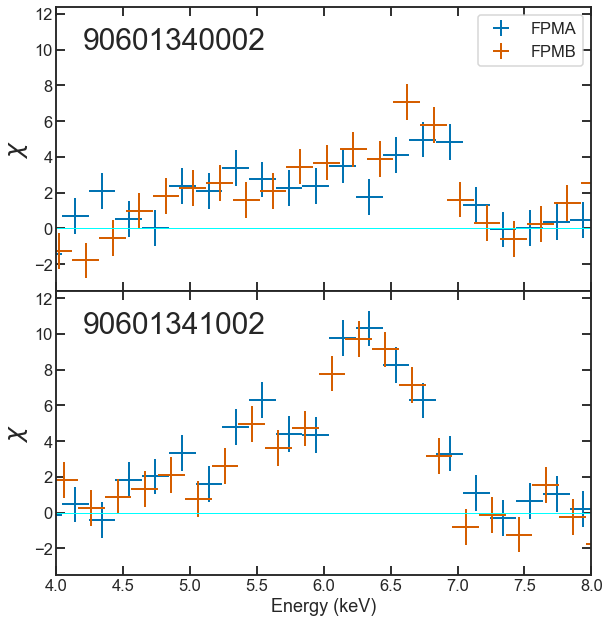

In [48]:
file_soft = open(root_dir + '90601340002_products06/tbabs_diskbb_pl.qdp', 'r')
file_hard = open(root_dir + '90601341002_products06/tbabs_cutoffpl.qdp', 'r')

data_soft = read_QDP(file_soft)
data_hard = read_QDP(file_hard)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True,  gridspec_kw = {'height_ratios':[1, 1], 'hspace':0}, figsize=(9, 9))

ax1.errorbar(data_soft[0][0],(data_soft[0][2]-data_soft[0][4])/data_soft[0][3], xerr=data_soft[0][1], yerr=1.0, \
             ls=ls, color='C0', lw=lw, label='FPMA')
ax1.errorbar(data_soft[1][0],(data_soft[1][2] - data_soft[1][4])/data_soft[1][3], xerr=data_soft[1][1],yerr=1.0, \
             ls=ls, color='C3', lw=lw, label='FPMB')

ax1.text(4.2, 10, '90601340002', fontsize=30)

ax2.errorbar(data_hard[0][0],(data_hard[0][2]-data_hard[0][4])/data_hard[0][3], xerr=data_hard[0][1], yerr=1.0, \
             ls=ls, color='C0', lw=lw)
ax2.errorbar(data_hard[1][0],(data_hard[1][2] - data_hard[1][4])/data_hard[1][3], xerr=data_hard[1][1],yerr=1.0, \
             ls=ls, color='C3', lw=lw)

ax2.text(4.2, 10, '90601341002', fontsize=30)


ax1.set_ylabel(r'$\chi$', fontsize=25)
ax1.axhline(0,color='cyan', lw=1.0)
# ax1.set_ylim(-3.5,9)
ax1.set_ylim(-3.5,12.4)
ax1.set_xlim(4,8)
ax1.legend()
# ax1.set_xscale('log')
plt.xlabel('Energy (keV)')
ax2.set_ylabel(r'$\chi$', fontsize=25)
ax2.axhline(0,color='cyan', lw=1.0)
ax2.set_ylim(-3.5,12.4)

# # ax1.text(2.9, 2e-5, '(a)')
# # ax2.text(2.9, -4, '(b)')

# ax1.set_yticks(ticks= [1e-2, 1e-1], minor=False)
# # ax1.set_yticks(ticks= [], minor=True)

# ax2.set_yticks(ticks= [-3, 0, 3], minor=False)
# ax2.set_yticklabels(labels= [r'$-3$', r'$0$', r'$3$'], minor=False)

# ax2.set_xticks(ticks= [10], minor=False)
# ax2.set_xticklabels(labels= [10], minor=False, fontsize=14)

# ax2.set_xticks(ticks= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True)
# ax2.set_xticklabels(labels= [3, 4, 5, 6, 7, 8, 9, 20, 30, 40, 50, 60, 70, 80], minor=True, fontsize=12)

ax1.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both',which='both', direction='in', bottom=True, top=True, left=True, right=True)

plt.tight_layout()

plt.savefig(fig_dir + 'Fe_lines.pdf')

